## Introduction

Logistic Regression is a machine learning technique commonly used to estimate the probability that an instance belongs to a particular class. If the estimated probability is greater than a threshold (usually is 50%), then the model predicts that the instance belongs to that class, called the positive class (labeled “1”), and otherwise it predicts that it does not, therefore it would belong to the negative class (labeled "0").

#### <a href="#simpleRegression" id="menu">1. Logistic regression from scratch</a>
#### <a href="#LogisticRegression" id="menu">2. Logistic regression using scikit learn</a>

In [1]:
# Import libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For visualizations we will use ggplot stlye and Century Gothic as font family
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Century Gothic' 

## <a href="#menu" id="simpleRegression">1. Logistic regression from scratch</a>

In this section we will build a logistic regression model from scratch using all the math behind the algorithm

### 1.1 Estimating probabilities: Sigmoid function

To guarantee that the probabilities returned by the model are always within the range of 0 and 1, we will use the logistic function, also known as the sigmoid function

### $ \hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}} $

Where: 

### $z = \theta^T X$

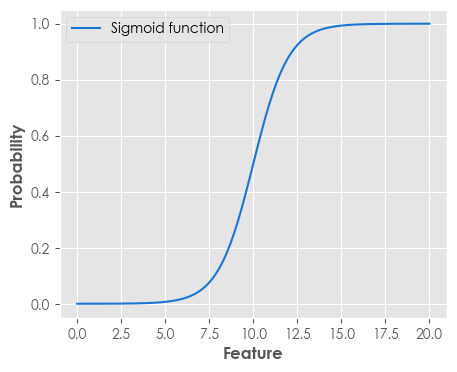

In [2]:
# This is how sigmoid function looks
x = np.linspace(0, 20, 100)
y = 1 / (1 + np.exp(10-x))

plt.figure(figsize=(5, 4))
plt.plot(x, y, label='Sigmoid function', color='#1976D2')
plt.xlabel('Feature', fontweight='bold')
plt.ylabel('Probability', fontweight='bold')
plt.legend()
plt.show()

### 1.2 Building the model

For this case we will generate our own data, as the goal is to learn how the logistic regression algorithm works.

In [3]:
# Generate data to address binary predictions
zeros = np.zeros(50)
ones = np.ones(50)
X = np.linspace(0, 25, 100)
y = np.concatenate((zeros, ones))

# Build a dataframe with data generated
logit_df = pd.DataFrame(data=np.column_stack((X, y)), columns=['X', 'y'])
logit_df.head()

,X,y
0,0.000000,0.0
1,0.252525,0.0
2,0.505051,0.0
3,0.757576,0.0
4,1.010101,0.0


In [4]:
# Build the sigmoid function to estimate probabilities (predictions)
def sigmoid(X_b, theta):
    z = X_b.dot(theta)
    predictions = 1 / (1 + np.exp(-z))
    return predictions

Once the Logistic Regression model has estimated the probability, it can makes predictions easily

$\hat{y} = \begin{cases}
    0 & \text{if } p < threshold \\
    1 & \text{if } p \geq threshold
\end{cases} $


### 1.3 Training and Loss function

In linear regression we use the Mean Squared Error (MSE) to minimize the loss function, however if we apply the same procedure here, we will find out there are a lot of local minimum values and therefore the algorithm can stop the process before finding the global minimum. For that reason, we use the cross entropy loss function

### $ H = - \sum_{i=1}^{m} \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right] $

In [5]:
# Build the cross entropy loss function
def cross_entropy(predictions, y):
    cost = -1/len(y) * (y.dot(np.log(predictions)) + (1 - y).dot(np.log(1 - predictions)))
    return cost

We are almost done. Since we have a loss function, we need to build an algorithm that will allow us to minimize this cost function. One of the most common methods used to achieve cost minimization is gradient descent. After doing some calculus we will find out the algorithm that minimizes the loss function and gets the parameters to estimate probabilities

### $ \theta^{next} = \theta^{actual} - n [\frac{1}{m} \sum_{i=1}^{m} (\hat{y} - y) X] $

In [6]:
# Build the model that estimates the parameters using gradient descend
def gradient_descend(X_b, predictions, learning_rate, theta):
    gradient = X_b.T.dot(predictions - y) / len(X_b)
    theta = theta - learning_rate * gradient
    return theta

### 1.4 Test the model

Our model is ready. Time for testing 

In [7]:
# Initialize parameters
theta = np.zeros((2,))
learning_rate = 0.01
epochs = 10000

# Add the bias column to X matrix
X_b = np.c_[np.ones((len(X), 1)), X]

# Create an empty list to store loss function values
entropy = []

for i in range(epochs):

    # Sigmoid function
    predictions = sigmoid(X_b, theta)

    # Cross entropy loss function
    cost = cross_entropy(predictions, y)
    entropy.append(cost)

    # Gradient descend
    theta = gradient_descend(X_b, predictions, learning_rate, theta)

In [8]:
# Get the final predictions using our parameters
final_predictions = sigmoid(X_b, theta)

# Define a threshold and return prediction as a binary number
threshold = 0.5
binary_predictions = (final_predictions >= threshold).astype(int)

# Finally, evaluate the model performance
accuracy = np.mean(binary_predictions == y) * 100
print(f'The model accuracy is {accuracy:.2f} %')

The model accuracy is 98.00 %


We can also calculate the boundary decision, defined as the line, plane or hyperplane that marks the boundary between the instances that the model classifies as a positive class and the instances that it classifies as a negative class. (In the chart below you will see two datapoints crossed the border of the boundary decision plane. Those are the wrong predictions)

In [9]:
boundary = -theta[0]/theta[1]

### 1.5 Visualize the results

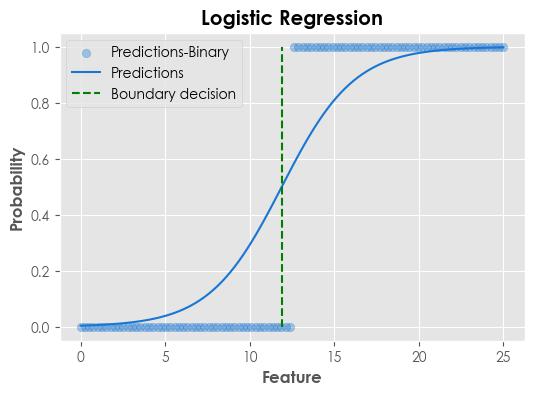

In [10]:
# Visualize the final results by plotting the predictions of the model in a binary format and in a continuous format
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='#1976D2', label='Predictions-Binary', alpha=0.35)
plt.plot(X, final_predictions, color='#1976D2', label='Predictions')
plt.plot([boundary, boundary], [0,1], 'g--', label='Boundary decision')
plt.title('Logistic Regression', fontweight='bold')
plt.xlabel('Feature', fontweight='bold')
plt.ylabel('Probability', fontweight='bold')
plt.legend()
plt.show()

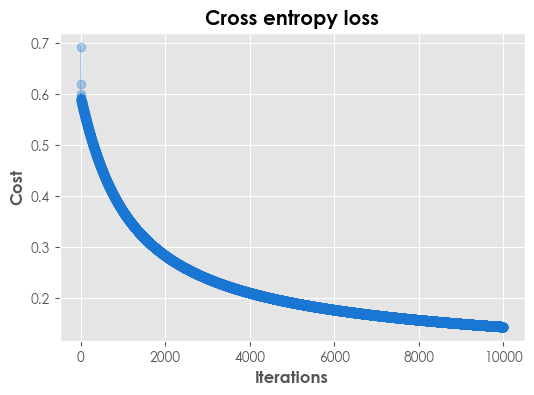

In [11]:
# Visualize the cross entropy loss function
plt.figure(figsize=(6, 4))
plt.plot(range(1, epochs + 1), entropy, marker='o', linestyle='-', color='#1976D2', linewidth=1, alpha=0.3)
plt.title('Cross entropy loss', fontweight='bold')
plt.xlabel('Iterations', fontweight='bold')
plt.ylabel('Cost', fontweight='bold')
plt.show()

## <a href="#menu" id="LogisticRegression">2. Logistic Regression using Scikit learn</a>

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = logit_df[['X']]
y = logit_df['y']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions and return in float format
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f'The model accuracy is {accuracy*100:.3f} %')

The model accuracy is 100.000 %
